# Comparison of Voyage AI Embedding and TF-IDF Embeddings

In [ ]:
!pip install bertopic datasets accelerate bitsandbytes xformers adjustText

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_nvjitlink_cu12-12.6.20-py3-none-manyl

In [ ]:
!pip install --upgrade torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 44.3 MB/s eta 0:00:00
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.18.1+cu121
    Uninstalling torchvision-0.18.1+cu121:
      Successfully uninstalled torchvision-0.18.1+cu121


In [ ]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sf9_df = pd.read_csv('/content/sf9-preprocessed_df.csv')

In [ ]:
sf9_df.head()

,conversation_id,text,reply_count,first_tweet,Text,cleaned_text
0,1658489916412801024,Fantasy friends plz help me to find the nicest...,2,Fantasy friends plz help me to find the nicest...,"['fantasy', 'friend', 'plz', 'help', 'find', '...",fantasy friend plz help find nicest full body ...
1,1658831414291226624,praying that kflex london has an amazing lineu...,1,praying that kflex london has an amazing lineu...,"['praying', 'kflex', 'london', 'amazing', 'lin...",praying kflex london amazing lineup just like ...
2,1658872268708265984,im already tired but still need to stay up to ...,1,im already tired but still need to stay up to ...,"['already', 'tired', 'still', 'need', 'stay', ...",already tired still need stay assignment help ...
3,1658916239949930553,I will probably delete this tweet later but I ...,1,I will probably delete this tweet later but I ...,"['will', 'probably', 'delete', 'tweet', 'later...",will probably delete tweet later just got inte...
4,1659090060279529472,everyone pray for my accounting tmrw @i520rick...,5,everyone pray for my accounting tmrw,"['everyone', 'pray', 'accounting', 'tmrw', 'aw...",everyone pray accounting tmrw aww thank bff ri...


## Using Voyage AI Embeddings

In [ ]:
sf9_embeddings = np.load('/content/sf9-concatenated-2.npy')

In [ ]:
sf9_docs = sf9_df['cleaned_text'].tolist()

In [ ]:
!pip install voyageai

In [ ]:
import voyageai

vo = voyageai.Client(api_key="")

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
from torch import cuda

model_id = 'meta-llama/Llama-2-7b-chat-hf'
device = f'cuda:{cuda.current_device()}' if cuda.is_available() else 'cpu'

print(device)

cuda:0


In [ ]:
from torch import bfloat16
import transformers

# set quantization configuration to load large model with less GPU memory
# this requires the `bitsandbytes` library

bnb_config = transformers.BitsAndBytesConfig(
    load_in_4bit=True,  # 4-bit quantization
    bnb_4bit_quant_type='nf4',  # Normalized float 4
    bnb_4bit_use_double_quant=True,  # Second quantization after the first
    bnb_4bit_compute_dtype=bfloat16  # Computation type
)

In [ ]:
# Llama 2 Tokenizer
tokenizer = transformers.AutoTokenizer.from_pretrained(model_id)

# Llama 2 Model
model = transformers.AutoModelForCausalLM.from_pretrained(
    model_id,
    trust_remote_code=True,
    quantization_config=bnb_config,
    device_map='auto',
)
model.eval()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.62k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/614 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.50G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/188 [00:00<?, ?B/s]

LlamaForCausalLM(
  (model): LlamaModel(
    (embed_tokens): Embedding(32000, 4096)
    (layers): ModuleList(
      (0-31): 32 x LlamaDecoderLayer(
        (self_attn): LlamaSdpaAttention(
          (q_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
          (k_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
          (v_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
          (o_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
          (rotary_emb): LlamaRotaryEmbedding()
        )
        (mlp): LlamaMLP(
          (gate_proj): Linear4bit(in_features=4096, out_features=11008, bias=False)
          (up_proj): Linear4bit(in_features=4096, out_features=11008, bias=False)
          (down_proj): Linear4bit(in_features=11008, out_features=4096, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): LlamaRMSNorm()
        (post_attention_layernorm): LlamaRMSNorm()
      )
    )
    (norm): Lla

In [ ]:
 # Our text generator
generator = transformers.pipeline(
    model=model, tokenizer=tokenizer,
    task='text-generation',
    temperature=0.1,
    max_new_tokens=500,
    repetition_penalty=1.1
)

In [ ]:
# System prompt describes information given to all conversations
system_prompt = """
<s>[INST] <<SYS>>
You are a helpful, respectful and honest assistant for labeling topics.
<</SYS>>
"""

In [ ]:
# Example prompt demonstrating the output we are looking for
example_prompt = """
I have a topic that contains the following documents:
- Traditional diets in most cultures were primarily plant-based with a little meat on top, but with the rise of industrial style meat production and factory farming, meat has become a staple food.
- Meat, but especially beef, is the word food in terms of emissions.
- Eating meat doesn't make you a bad person, not eating meat doesn't make you a good one.

The topic is described by the following keywords: 'meat, beef, eat, eating, emissions, steak, food, health, processed, chicken'.

Based on the information about the topic above, please create a short label of this topic. Make sure you to only return the label and nothing more.

[/INST] Environmental impacts of eating meat
"""

In [ ]:
# Our main prompt with documents ([DOCUMENTS]) and keywords ([KEYWORDS]) tags
main_prompt = """
[INST]
I have a topic that contains the following documents:
[DOCUMENTS]

The topic is described by the following keywords: '[KEYWORDS]'.

Based on the information about the topic above, please create a short label of this topic. Make sure you to only return the label and nothing more.
[/INST]
"""

In [ ]:
prompt = system_prompt + example_prompt + main_prompt

In [ ]:
from bertopic.representation import KeyBERTInspired, MaximalMarginalRelevance, TextGeneration

# KeyBERT
keybert = KeyBERTInspired()

# MMR
mmr = MaximalMarginalRelevance(diversity=0.3)

# Text generation with Llama 2
llama2 = TextGeneration(generator, prompt=prompt)

# All representation models
representation_model = {
    "KeyBERT": keybert,
    "Llama2": llama2,
    "MMR": mmr,
}

In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

#Clustering using k-means clustering
cluster_model = KMeans(n_clusters=5)

In [ ]:
from bertopic import BERTopic

sf9_topic_model = BERTopic(

  # Sub-models
  embedding_model=vo,
  hdbscan_model=cluster_model,
  representation_model=representation_model,

  # Hyperparameters
  top_n_words=5,
  verbose=True
)

# Train model
sf9_topics, sf9_probs = sf9_topic_model.fit_transform(sf9_docs,sf9_embeddings)

2024-08-06 17:56:13,047 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-08-06 17:56:15,316 - BERTopic - Dimensionality - Completed ✓
2024-08-06 17:56:15,317 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-06 17:56:15,489 - BERTopic - Cluster - Completed ✓
2024-08-06 17:56:15,493 - BERTopic - Representation - Extracting topics from clusters using representation models.
100%|██████████| 5/5 [00:47<00:00,  9.48s/it]
2024-08-06 17:57:03,269 - BERTopic - Representation - Completed ✓


In [ ]:
# Show topics
sf9_topic_model.get_topic_info()

,Topic,Count,Name,Representation,KeyBERT,Llama2,MMR,Representative_Docs
0,0,31,0_link_like_help_need,"[link, like, help, need, instinctangel]","[stuff, lf, smt, mean, like, mushroom, know, t...","[Mental Health and the Use of Packing Tape, , ...","[link, need, instinctangel, tape, froggienoya,...",[people pack pc sell kind masking packing tape...
1,1,31,1_just_like_dimiiuc_fandom,"[just, like, dimiiuc, fandom, steaitherest]","[fandom, feel, life, whatever, keep, leave, fo...","[Fandom Discussions and Personal Experiences, ...","[like, fandom, steaitherest, feel, ppl, keep, ...",[time admit danmei hyperfixation kind waned ha...
2,2,30,2_link__montasy__mochiemobts_one,"[link, _montasy_, mochiemobts, one, got]","[yooniquelyjae, krklemm, kebinwooo, __ysyh, 원어...",[K-pop and K-beauty enthusiasts' online intera...,"[mochiemobts, tattoo, madame_tourvel, jihoon, ...",[thinking kflex postponed actually worst way m...
3,3,28,3_happy_thank_birthday_dprian_,"[happy, thank, birthday, dprian_, love]","[birthday, day, happy, congratulation, life, f...","[Happy Birthday, , , , , , , , , ]","[happy, birthday, dprian_, sonderstarlight, da...",[got birthday balloon can believe turning old ...
4,4,21,4_hope_redcherrydream_thank_just,"[hope, redcherrydream, thank, just, sleep]","[rest, break, sleep, feeling, hope, hug, going...","[Mental Health and Sleep Deprivation, , , , , ...","[hope, redcherrydream, twowomenkpop, sending, ...",[hi gonna twt today dog sick idk much time lef...


In [ ]:
for i,words in enumerate(sf9_topic_model.get_topic_info()['Representation']):
  print(f'Topic {i}: {words}')

Topic 0: ['link', 'like', 'help', 'need', 'instinctangel']
Topic 1: ['just', 'like', 'dimiiuc', 'fandom', 'steaitherest']
Topic 2: ['link', '_montasy_', 'mochiemobts', 'one', 'got']
Topic 3: ['happy', 'thank', 'birthday', 'dprian_', 'love']
Topic 4: ['hope', 'redcherrydream', 'thank', 'just', 'sleep']


In [ ]:
for i,topic_names in enumerate(sf9_topic_model.get_topic_info()['Llama2']):
  print(f'Topic {i}: {topic_names}')

Topic 0: ['Mental Health and the Use of Packing Tape', '', '', '', '', '', '', '', '', '']
Topic 1: ['Fandom Discussions and Personal Experiences', '', '', '', '', '', '', '', '', '']
Topic 2: ["K-pop and K-beauty enthusiasts' online interactions and preferences", '', '', '', '', '', '', '', '', '']
Topic 3: ['Happy Birthday', '', '', '', '', '', '', '', '', '']
Topic 4: ['Mental Health and Sleep Deprivation', '', '', '', '', '', '', '', '', '']


In [ ]:
for i,words in enumerate(sf9_topic_model.get_topic_info()['MMR']):
  print(f'Topic {i}: {words}')

Topic 0: ['link', 'need', 'instinctangel', 'tape', 'froggienoya', 'mushroom', 'sonderstarlight', 'aishaishious', 'kxcvxvii', 'month']
Topic 1: ['like', 'fandom', 'steaitherest', 'feel', 'ppl', 'keep', 'hair', 'true', 'miss', 'god']
Topic 2: ['mochiemobts', 'tattoo', 'madame_tourvel', 'jihoon', 'kebinwooo', 'haruto', '원어스', '건희', 'want', 'yooniquelyjae']
Topic 3: ['happy', 'birthday', 'dprian_', 'sonderstarlight', 'day', 'dahlihwa', 'morning', 'cute', 'exam', 'll']
Topic 4: ['hope', 'redcherrydream', 'twowomenkpop', 'sending', 'peachyahxo', 'day', 'rest', 'okay', 'condolence', 'going']


In [ ]:
for i,words in enumerate(sf9_topic_model.get_topic_info()['KeyBERT']):
  print(f'Topic {i}: {words}')

Topic 0: ['stuff', 'lf', 'smt', 'mean', 'like', 'mushroom', 'know', 'tweet', 'moot', 'fun']
Topic 1: ['fandom', 'feel', 'life', 'whatever', 'keep', 'leave', 'follow', 'mean', 'steaitherest', 'tweet']
Topic 2: ['yooniquelyjae', 'krklemm', 'kebinwooo', '__ysyh', '원어스', 'thekpopempire', 'say', 'keonhee', 'tomorrowbyskz', 'get']
Topic 3: ['birthday', 'day', 'happy', 'congratulation', 'life', 'feeling', 'congrats', 'feel', 'ldwww_w_', 'wish']
Topic 4: ['rest', 'break', 'sleep', 'feeling', 'hope', 'hug', 'going', 'work', 'keep', 'care']


In [ ]:
for i,repre_doc in enumerate(sf9_topic_model.get_topic_info()['Representative_Docs']):
  print(f'Topic {i}: {repre_doc}')

Topic 0: ['people pack pc sell kind masking packing tape enemy understand keeping item safe can open package hand get knife cut damn vacuum sealed envelope ur just inconvenient yechansbestie yeah like scared going damage pc inside bc inside taped masking tape inside envelope shut masking tape like maneuver way around tape bend toploader pc like come jaengpup fjsjfjnsfn noooooo even use big piece washi tape make nearly impossible someone reuse supply like crazy yechansbestie difficult open like thought knew use washi tape inside stuff easy get heavy duty stuff outside needed know yechansbestie understand mean ppl use packing tape around entire thing point can open without potentially damaging stuff inside bc need use something sharp open today received pc inside envelop used masking tape jaengpup reinforce edge envelope packing tape bc received pc envelope ripped open sent pc someone envelope arrived completely empty try leave envelope flap accessible tho impossible like realize use tap

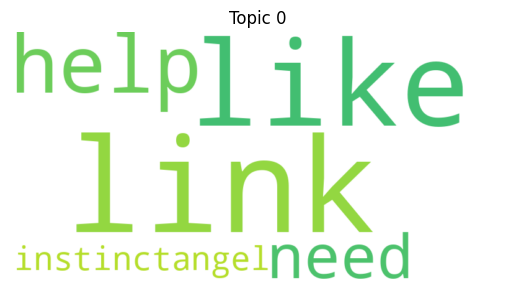

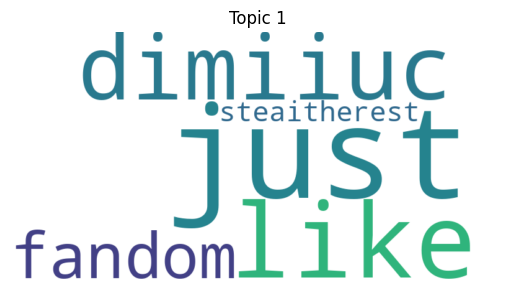

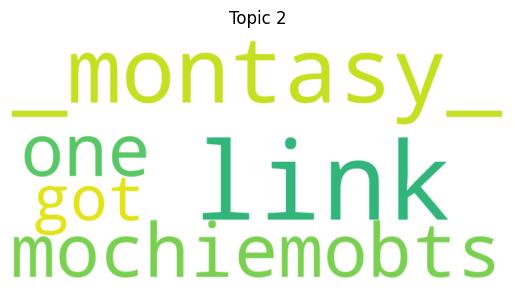

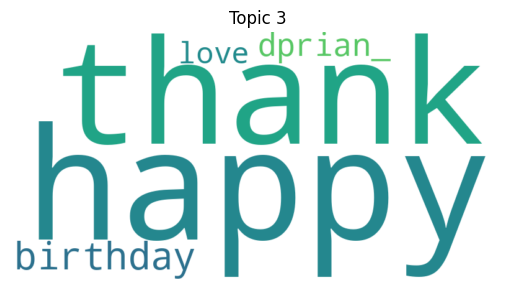

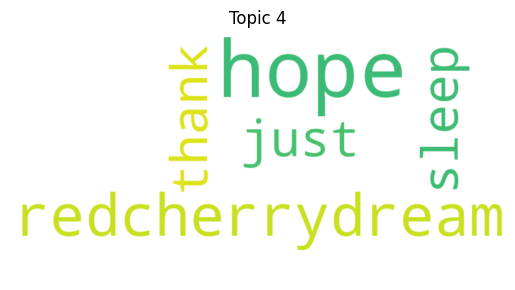

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

topic_info = sf9_topic_model.get_topic_info()

for topic in topic_info['Topic'].unique():
    if topic == -1:
        continue  # Skip the outlier topic
    words = dict(sf9_topic_model.get_topic(topic))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(words)

    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Topic {topic}")
    plt.show()

In [ ]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary

# Get topics and their top words
sf9_topics = sf9_topic_model.get_topics()

# Extract words from the topics
sf9_topic_words = [[word for word, _ in words] for words in sf9_topics.values()]

# Prepare a corpus and dictionary for coherence calculation
texts = [text.split() for text in sf9_docs]  # Replace 'data' with your dataset
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

coherence_model = CoherenceModel(topics=sf9_topic_words, texts=texts, dictionary=dictionary, coherence='u_mass')
coherence_score = coherence_model.get_coherence()

print(f"Coherence Score: {coherence_score}")

Coherence Score: -3.1048817342556343


In [ ]:
coherence_model = CoherenceModel(topics=sf9_topic_words, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()

print(f"Coherence Score: {coherence_score}")

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning:

os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



Coherence Score: 0.5881698991428221


In [ ]:
sf9_topic_model.visualize_topics()

In [ ]:
sf9_topic_model.visualize_barchart()

## Using TF-IDF for Word Embedding

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=500)
tf_idf_embeddings = vectorizer.fit_transform(sf9_docs)

In [ ]:
from bertopic import BERTopic

sf9_topic_model_2 = BERTopic(

  # Sub-models
  embedding_model=vectorizer,
  hdbscan_model=cluster_model,
  representation_model=representation_model,

  # Hyperparameters
  top_n_words=5,
  verbose=True
)

# Train model
sf9_topics_2, sf9_probs_2 = sf9_topic_model_2.fit_transform(sf9_docs,tf_idf_embeddings)

2024-08-06 17:58:26,197 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-08-06 17:58:37,586 - BERTopic - Dimensionality - Completed ✓
2024-08-06 17:58:37,587 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-06 17:58:37,752 - BERTopic - Cluster - Completed ✓
2024-08-06 17:58:37,756 - BERTopic - Representation - Extracting topics from clusters using representation models.
100%|██████████| 5/5 [00:42<00:00,  8.43s/it]
2024-08-06 17:59:20,440 - BERTopic - Representation - Completed ✓


In [ ]:
# Show topics
sf9_topic_model_2.get_topic_info()

,Topic,Count,Name,Representation,KeyBERT,Llama2,MMR,Representative_Docs
0,0,37,0_thank_happy_link_birthday,"[thank, happy, link, birthday, love]","[birthday, day, congratulation, happy, thankfu...","[Happy Birthday, , , , , , , , , ]","[happy, birthday, cute, day, froggienoya, keon...",[got birthday balloon can believe turning old ...
1,1,30,1_like_just_can_love,"[like, just, can, love, dimiiuc]","[fandom, tattoo, mean, feel, say, keep, lol, k...","[Social Media Discourse and Online Fandom, , ,...","[dimiiuc, ppl, feel, instinctangel, tattoo, fa...",[thinking kflex postponed actually worst way m...
2,2,27,2_will__montasy__mochiemobts_madame_tourvel,"[will, _montasy_, mochiemobts, madame_tourvel,...","[yooniquelyjae, tweet, soobinurhome, yootae, s...","[K-pop fandom and merchandise, , , , , , , , , ]","[mochiemobts, madame_tourvel, hair, haonslut, ...",[hi filo road𝓨 since xikers star platform vers...
3,3,25,3_hope_redcherrydream_even_sorry,"[hope, redcherrydream, even, sorry, better]","[rest, break, work, sleep, feeling, keep, care...","[Mental Health and Self-Care, , , , , , , , , ]","[redcherrydream, ll, morganbbang, enbyuno, two...",[look co worker face found sleep wake hour lat...
4,4,22,4_kxcvxvii_need_jihoon_link,"[kxcvxvii, need, jihoon, link, haruto]","[kxcvxvii, handsome, tomorrowbyskz, yall, jiho...","[K-pop and social media culture, , , , , , , ,...","[kxcvxvii, need, jihoon, naziatheworld, song, ...",[tl cleanse jihoon best leader jihoon best boy...


In [ ]:
for i,words in enumerate(sf9_topic_model_2.get_topic_info()['Representation']):
  print(f'Topic {i}: {words}')

Topic 0: ['thank', 'happy', 'link', 'birthday', 'love']
Topic 1: ['like', 'just', 'can', 'love', 'dimiiuc']
Topic 2: ['will', '_montasy_', 'mochiemobts', 'madame_tourvel', 'moot']
Topic 3: ['hope', 'redcherrydream', 'even', 'sorry', 'better']
Topic 4: ['kxcvxvii', 'need', 'jihoon', 'link', 'haruto']


In [ ]:
for i,words in enumerate(sf9_topic_model_2.get_topic_info()['MMR']):
  print(f'Topic {i}: {words}')

Topic 0: ['happy', 'birthday', 'cute', 'day', 'froggienoya', 'keonhee', '원어스', 'siren', '건희', 'dahlihwa']
Topic 1: ['dimiiuc', 'ppl', 'feel', 'instinctangel', 'tattoo', 'fandom', 'steaitherest', 'artist', 'kebinwooo', 'tape']
Topic 2: ['mochiemobts', 'madame_tourvel', 'hair', 'haonslut', 'yooniquelyjae', 'tour', 'lf', 'soobinurhome', 'want', 'ticket']
Topic 3: ['redcherrydream', 'll', 'morganbbang', 'enbyuno', 'twowomenkpop', 'sleep', 'meg_marvels', 'peachyahxo', 'ok', 'sending']
Topic 4: ['kxcvxvii', 'need', 'jihoon', 'naziatheworld', 'song', 'tomorrowbyskz', 'euijeongify', 'osoilem', 'shake', 'changmin']


In [ ]:
for i,topic_names in enumerate(sf9_topic_model_2.get_topic_info()['Llama2']):
  print(f'Topic {i}: {topic_names}')

Topic 0: ['Happy Birthday', '', '', '', '', '', '', '', '', '']
Topic 1: ['Social Media Discourse and Online Fandom', '', '', '', '', '', '', '', '', '']
Topic 2: ['K-pop fandom and merchandise', '', '', '', '', '', '', '', '', '']
Topic 3: ['Mental Health and Self-Care', '', '', '', '', '', '', '', '', '']
Topic 4: ['K-pop and social media culture', '', '', '', '', '', '', '', '', '']


In [ ]:
for i,words in enumerate(sf9_topic_model_2.get_topic_info()['KeyBERT']):
  print(f'Topic {i}: {words}')

Topic 0: ['birthday', 'day', 'congratulation', 'happy', 'thankful', 'morning', 'congrats', 'wish', 'today', 'jaengpup']
Topic 1: ['fandom', 'tattoo', 'mean', 'feel', 'say', 'keep', 'lol', 'know', 'get', 'stuff']
Topic 2: ['yooniquelyjae', 'tweet', 'soobinurhome', 'yootae', 'spcygomtokki', 'haonslut', 'taesanade', 'taehun', 'follow', 'gonna']
Topic 3: ['rest', 'break', 'work', 'sleep', 'feeling', 'keep', 'care', 'job', 'feel', 'hope']
Topic 4: ['kxcvxvii', 'handsome', 'tomorrowbyskz', 'yall', 'jihoon', 'smol', 'haruto', 'thanks', 'll', 'lovely_univrs']


In [ ]:
for i,repre_doc in enumerate(sf9_topic_model_2.get_topic_info()['Representative_Docs']):
  print(f'Topic {i}: {repre_doc}')

Topic 0: ['got birthday balloon can believe turning old hag now anyways thankful god granting another year life surrounding many amazing people couldn thankful link whereisperseus thank christy mean lot miss well jacquelame happy birthday dear friend miss hope best day rtljoshua thank can wait link next concert jieunsnamyu thank aime love bestie jacquelame jackieeee happy birthday bff love jacquelame happiest birthday bestie can wait see makeitbloo_ thank abi rgbelenadraws ty friend jacquelame happy birthday jacquelame happy birthday jacquelame omg happy birthday amazing day chula', 'disheartened thing today made also spending work rip still break wanted check hope everyone well ll back new fic month gift hope enjoy lt back soon link sonderstarlight happy happy enjoy link sonderstarlight happy birthday siren sending best wish way may year bring many moment love happiness treat deserve take care link sonderstarlight happy birthday sonderstarlight happy happy day sonderstarlight happy bd

### CV Coherence Score

In [ ]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary

# Get topics and their top words
sf9_topics_2 = sf9_topic_model_2.get_topics()

# Extract words from the topics
sf9_topic_words_2 = [[word for word, _ in words] for words in sf9_topics_2.values()]

# Prepare a corpus and dictionary for coherence calculation
texts = [text.split() for text in sf9_docs]  # Replace 'data' with your dataset
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Compute the coherence score using c_v measure
coherence_model_2 = CoherenceModel(topics=sf9_topic_words_2, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_score_2 = coherence_model_2.get_coherence()

print(f"Coherence Score: {coherence_score_2}")

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning:

os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



Coherence Score: 0.44469859064471934


### UMass Coherence Score

In [ ]:
# Compute the coherence score using c_v measure
coherence_model_2 = CoherenceModel(topics=sf9_topic_words_2, texts=texts, dictionary=dictionary, coherence='u_mass')
coherence_score_2 = coherence_model_2.get_coherence()

print(f"Coherence Score: {coherence_score_2}")

Coherence Score: -5.492434058260789


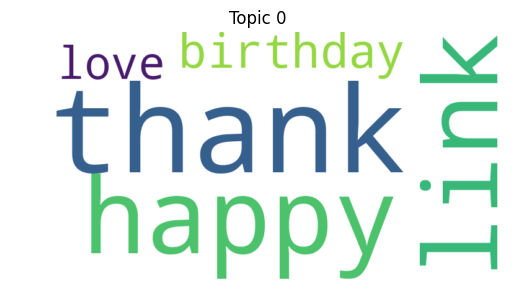

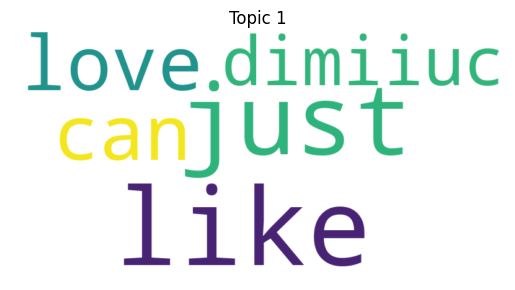

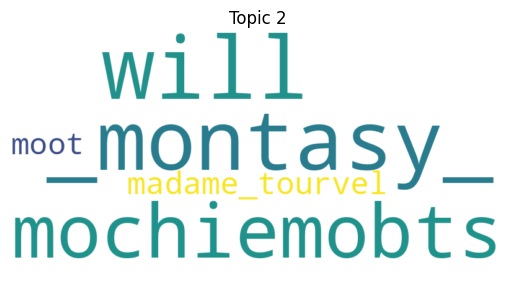

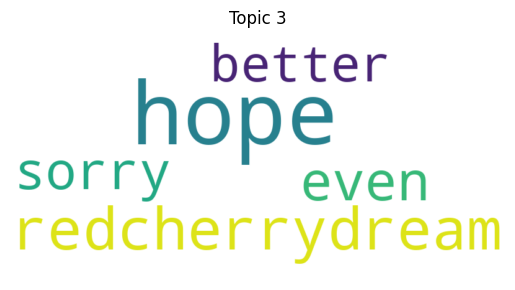

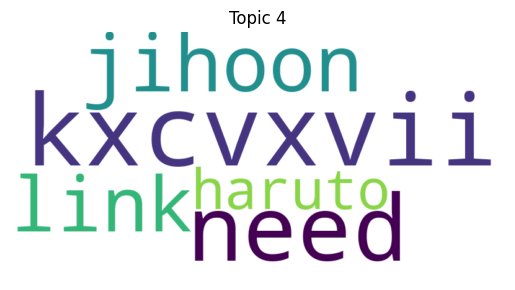

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

topic_info = sf9_topic_model_2.get_topic_info()

for topic in topic_info['Topic'].unique():
    if topic == -1:
        continue  # Skip the outlier topic
    words = dict(sf9_topic_model_2.get_topic(topic))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(words)

    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Topic {topic}")
    plt.show()

In [ ]:
sf9_topic_model_2.visualize_barchart()
